## Reloading imports

In [68]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
%autoreload

In [71]:
from params import FuzzyInputVariable_List_Trapezoids
import numpy as np
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from optimizers.swarm import SwarmOptimizer, Phase
from optimizers.default import DefaultOptimizer
from optimizers.genetic import GeneticOptimizer, SmallestMaeErrorFitness, MultiPointCrossing, NRandomChangesMutation, RouletteWheelSelection, RankSelection

## Util functions

In [4]:
def generate_data(size, plot=False):
    x = np.arange(1, size, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))
    data_labels = np.round(dataX) * np.round(dataY)
    
    if plot:
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]
        ax.scatter(dataX, dataY, data_labels, c=rgb)
        plt.show()
    
    return dataXY, data_labels

In [5]:
def test_optimizer(optimizer, size=4):
    # prepare data
    dataXY, data_labels = generate_data(size)
    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

    # create anfis
    mf1 = [[0.5+i, 0.5, 0.5, 0.5] for i in range(size)]
    var_names = [str(i) for i in range(size)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", var_names)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", var_names)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    # train
    start = time.time()
    fis.train(optimizer)
    elapsed_time = time.time() - start

    # evaluate on train data
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    train_accuracy = accuracy_score(y_train, y_pred)
    fis.show_results()

    # evaluate on test data
    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    test_accuracy = accuracy_score(y_test, y_pred)

    # print result
    print(f'Train data accuracy: {train_accuracy:.2f}')
    print(f'Test data accuracy: {test_accuracy:.2f}')
    print(f'Training time: {elapsed_time:.2f}')

## Tests

In [ ]:
optimizer = DefaultOptimizer(learn_operators=False)

test_optimizer(optimizer)

In [ ]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=50_000,
    n_elite=2,
    patience=500,
    learn_operators=False
)

test_optimizer(optimizer)

In [ ]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(4),
    NRandomChangesMutation(4),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=40_000,
    n_elite=2,
    patience=800,
    learn_operators=False
)

test_optimizer(optimizer)

In [ ]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(4),
    NRandomChangesMutation(4),
    RankSelection(10),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=40_000,
    n_elite=4,
    patience=1000,
    learn_operators=False
)

test_optimizer(optimizer)

In [ ]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=50_000,
    n_elite=2,
    patience=500,
    learn_operators=True
)

test_optimizer(optimizer)

In [ ]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=80,
    n_generations=15_000,
    n_elite=2,
    patience=70,
    learn_operators=True
)

test_optimizer(optimizer, size=6)

In [87]:
%autoreload

Evolving: 100%|██████████| 20000/20000 [03:53<00:00, 85.56it/s, v=0.35, value=789.7723] 


Optimization finished after 233.75s


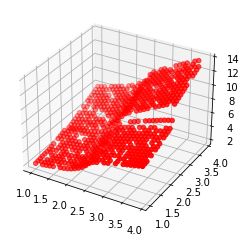

Train data accuracy: 0.27
Test data accuracy: 0.23
Training time: 233.75


In [89]:
phases = [
    Phase(w=1.0, c1=0, c2=0, phase_iters=5000),
    Phase(w=0.8, c1=0.2, c2=0, phase_iters=5000),
    Phase(w=0.7, c1=0.25, c2=0.25),
]

optimizer = SwarmOptimizer(
    phases,
    n_particles=1000,
    v=0.3,
    max_iters=20000,
    tol=1e-2,
    n_tol=900,
)

test_optimizer(optimizer, size=4)

In [9]:
optimizer = SwarmOptimizer()

test_optimizer(optimizer, size=6)

ValueError: operands could not be broadcast together with shapes (100,192) (100,2) 